# Created by Wenhan Hua

Mar. 7th 2023

The system Hamiltonian can be written as:

$$ H = H_{circuit} + H_{motion} + H_{int} $$

- $H_{circuit} $: the hamiltonian for the eletric circuit

It can be buit as,

$$H_{circuit} = \frac{\Phi^2}{2L} + \frac{Q^2}{2C} = \frac{\Phi^2}{2L} + \frac{1}{2} L\Omega^2 Q^2 $$

with the LC resonator frequency $\Omega = 1/\sqrt{LC}$

- $H_{motions} $: the hamiltonian of the electron motion

$$ H_{motion} = \frac{p^2}{2m} + \frac{m}{2} W(t) x^2 $$

consider the full time-dependent trapping potential, 

$$ W(t) = \frac{\omega_{rf}^2}{4}[a_x + 2 q_x \cos(\omega_{rf} t)]$$

According to LBMW(Page 286, Equation 29). let $u(t)$ be the special solution, then the $x(t)$ and $p(t) $ can be reexpressed as

$$ x(t) = \sqrt{\frac{\hbar}{2m\nu}} \{ a u^*(t) + a^\dagger u(t)\} $$

$$ p(t) = \sqrt{\frac{\hbar m}{2\nu}} \{a \dot{u}^*(t) + a^\dagger \dot{u}(t)\} $$

Under the lowest order approximation of the solution of the Mathieu equation:

$$ \frac{d^2 x}{d\xi^2} + [a_x - 2q_x\cos(2\xi)] x = 0$$

is given by:

$$ u(t) = u_0 e^{ i\frac{\beta_u\omega_{rf} t}{2}}(1 - \frac{q_u}{2}\cos(\omega_{rf} t)) $$

- $H_{int}$: interaction hamiltonian between the two(damping force)

Interaction is given by:

$$ H_{int} = qU(r) $$

where $U(r) $ is the potential around the trapping position as 
$$ U(r_i) = U(0) + \frac{Q}{C} [(r_i / D_{1,i}) + s_i (r_i / D_{2,i})^2 + O(r^3)] $$

Where $Q$ is the charge on the resonator's cavity board, $D_{1, i}$ is the effective distance

Let's focus on the linear term:

$$ \frac{q}{C D_{1,i}} Q x = \frac{q}{C D_{1,i}} x_0 Q_0 (a_\phi e^{-i \Omega t} + a_\phi^\dagger e^{+i \Omega t}) [a_x e^{- i\nu t}(1-\frac{q_u}{2}\cos(\omega_{rf} t)) +  a_x^\dagger e^{+ i\nu t}(1-\frac{q_u}{2}\cos(\omega_{rf} t)) ]$$

with $x_0 = \sqrt{\frac{\hbar}{2m\nu}}$ and $ Q_0 = \sqrt{\frac{\hbar}{2L\Omega}} $, $\Omega$ is the resonator frequency

After doing the rotating wave approximation , consider there is only coupling in the x direction ($u = x$) and neglect the second order term(the parametric coupling term).we find two resonaces: 

1. When $\Omega = \omega_{rf} - \nu$, 
$$ <H_{int}> = - \frac{q q_x x_0 Q_0}{4 C D_{1,i}}[a_\phi a_x + a_\phi^\dagger a_x^\dagger] $$

2. When $\Omega = \omega_{rf} + \nu$,

$$ <H_{int}> = - \frac{q q_x x_0 Q_0}{4 C D_{1,i}}[a_\phi a_x^\dagger + a_\phi^\dagger a_x] $$

This problem is similar to the The Lindblad Master equation

https://qutip.org/docs/latest/guide/dynamics/dynamics-master.html#the-lindblad-master-equation

The evolution of a quantum system is governed by the von Neumann equation:

$$\dot{\rho}_{tot} (t) = - \frac{i}{\hbar}[H_{tot}, \rho_{tot}(t)] $$

the equivalent of the Schrödinger equation in the density matrix formalism, the total Hamiltonian is:

$$ H_{tot} = H_{sys} + H_{env} + H_{int} $$

In our case, $H_{sys} = H_{motion}$, $H_{env} = H_{circuit}$, $H_{int}$ is the coupling illustrated above.

we can at this point perform a partial trace over the environmental degrees of freedom, and thereby obtain a master equation for the motion of the original system density matrix. The most general trace-preserving and completely positive form of this evolution is the Lindblad master equation for the reduced density matrix $$\rho = Tr_{env}[\rho_{tot}] $$

The Lindblad master equation:

$$ \dot{\rho}(t) = - \frac{i}{\hbar} [H(t), \rho(t)] + \sum_n \frac{1}{2}[2 C_n \rho(t)C_n^\dagger - \rho(t) C_n^\dagger C_n - C_n^\dagger C_n \rho(t) ] $$

where the $C_n = \sqrt{\gamma_n} A_n $ are collapse operators,  $A_n $ are the operators through which the environment couples to the system in $H_{int}$
, and $\gamma$ are the corresponding rates. 

Note that the requirements to arrive at the master equation:

1. Separability: At $t=0$ there are no correlations between the system and its environment such that the total density matrix can be written as a tensor product  $\rho^I_{tot}(0) = \rho^I_{tot}(0) \bigotimes \rho^I_{env}(0) $

2. Born approximation: Requires: (1) that the state of the environment does not significantly change as a result of the interaction with the system; (2) The system and the environment remain separable throughout the evolution. These assumptions are justified if the interaction is weak, and if the environment is much larger than the system. In summary, $\rho_{tot}(t) = \rho_{tot}(t) \bigotimes \rho_{env} $

3. Markov approximation The time-scale of decay for the environment $\tau_{env}$ is much shorter than the smallest time-scale of the system dynamics $\tau_{sys}>>\tau_{env} $. This approximation is often deemed a “short-memory environment” as it requires that environmental correlation functions decay on a time-scale fast compared to those of the system.

4. Secular approximation Stipulates that elements in the master equation corresponding to transition frequencies satisfy |𝜔𝑎𝑏−𝜔𝑐𝑑|≪1/𝜏sys
, i.e., all fast rotating terms in the interaction picture can be neglected. It also ignores terms that lead to a small renormalization of the system energy levels. This approximation is not strictly necessary for all master-equation formalisms (e.g., the Block-Redfield master equation), but it is required for arriving at the Lindblad form (3) which is used in qutip.mesolve.

More specifically:

1. systems are not strongly coupled to their environment, the decay rates $\gamma_n$ be smaller than the minimum energy splitting in the system Hamiltonian.

2. systems with degenerate or nearly degenerate energy levels should be double checked

The deviation can be find here:
 
- https://arxiv.org/pdf/1110.2122.pdf

- https://aip.scitation.org/doi/10.1063/1.5115323

- https://en.wikipedia.org/wiki/Lindbladian

In [3]:
# Load the needed package
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import cmath
from scipy.fft import fft, fftfreq, ifft
from scipy.signal import find_peaks

from scipy.integrate import solve_ivp
from decimal import *
from tqdm import tqdm
from qutip import (Qobj, about, basis, coherent, coherent_dm, create, destroy,
                   expect, fock, fock_dm, mesolve, qeye, sigmax, sigmay,
                   sigmaz, tensor, thermal_dm, Bloch, about)


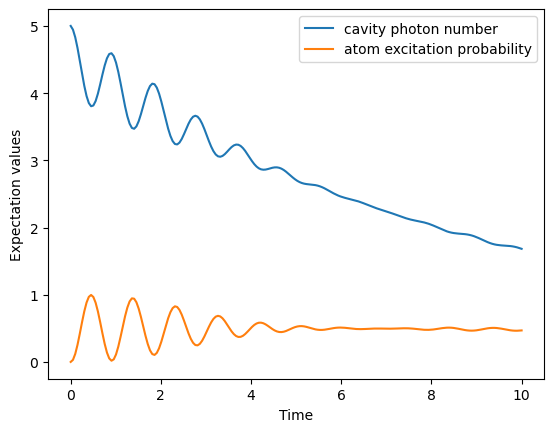